# Module 7 Exercises - Linear Regression

### Exercise 1:

Using the pandas library, in the datasets folder load the gradedata.csv file as a dataframe. Narrow your data (make the dataframe smaller) by choosing columns that you think can help predict student grades. Use any method that you've learned so far to help your decision on which columns to keep. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn #library for predictive modeling

%matplotlib inline

In [6]:
location = 'datasets/gradedata.csv'
df = pd.read_csv(location)
df

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"
5,Neil,Whitley,male,16,5,16,88.7,"40 Washington Ave., Bloomfield, NJ 07003"
6,Nelle,Golden,female,17,1,9,80.2,"9768 Hanover Dr., Meadville, PA 16335"
7,Armando,Hoffman,male,17,5,18,95.1,"360 Manor Drive, Northville, MI 48167"
8,Illiana,Rojas,female,15,5,9,76.5,"9425 Studebaker Dr., Thibodaux, LA 70301"
9,Neil,Wooten,male,15,3,15,89.7,"400 Bridge Court, Soddy Daisy, TN 37379"


In [8]:
df.keys()

Index(['fname', 'lname', 'gender', 'age', 'exercise', 'hours', 'grade',
       'address'],
      dtype='object')

In [45]:
df.count()

fname       2000
lname       2000
gender      2000
age         2000
exercise    2000
hours       2000
grade       2000
address     2000
dtype: int64

In [9]:
stats_df = df.drop(['address','fname','lname','gender'], axis=1)
stats_df.head()

,age,exercise,hours,grade
0,17,3,10,82.4
1,18,4,4,78.2
2,18,5,9,79.3
3,14,2,7,83.2
4,18,4,15,87.4


Text(0, 0.5, 'Student Grade')

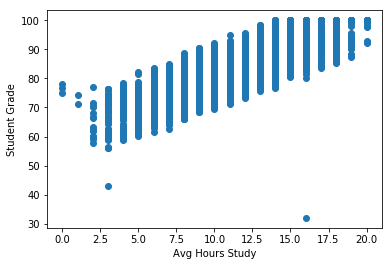

In [47]:
#relationship between hours studied and grades
plt.scatter(stats_df['hours'],stats_df['grade']) 
plt.xlabel('Avg Hours Study')
plt.ylabel ('Student Grade')

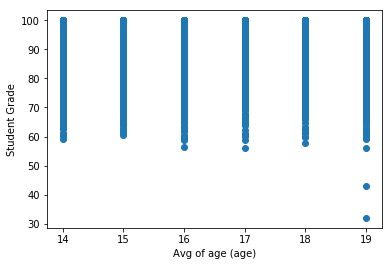

In [10]:
plt.scatter(stats_df['age'],stats_df['grade']) 
plt.xlabel('Avg of age (age)')
plt.ylabel ('Student Grade')
plt.show()

In [48]:
stats_df.count()

gender      2000
age         2000
exercise    2000
hours       2000
grade       2000
dtype: int64

### Exercise 2:

Using the dataframe in the exercise above, clean and prepare your data. This means to eliminate any null (missing) values (either by dropping or filling them) and to transform any data column types to numerical values that a model can interpret. For example, if the column has string values, convert them to integers that best represent their order.

In [51]:
stats_df_no_missing = stats_df.dropna()
stats_df_no_missing.count()

gender      2000
age         2000
exercise    2000
hours       2000
grade       2000
dtype: int64

In [13]:
def numeric_column(x):
    if x=='female':
        return 1
    if x=='male':
        return 0

In [15]:
df['gender_v']= df['gender'].apply(numeric_column)
df.head()

,fname,lname,gender,age,exercise,hours,grade,address,gender_v
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747",1
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780",0
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060",0
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125",1
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035",1


### Exercise 3:

Using the cleaned dataframe in the exercise above, use the sklearn library to split the data into training and test datasets. Make the test size 30%.

In [25]:
from sklearn.linear_model import LinearRegression


In [26]:
#Linear regression
lm= LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
df2= df.drop(['fname','lname','gender','address'],axis=1)

In [32]:
X= df2.drop('grade', axis=1)
X.head()

,age,exercise,hours,gender_v
0,17,3,10,1
1,18,4,4,0
2,18,5,9,0
3,14,2,7,1
4,18,4,15,1


In [33]:
X=df2.drop('grade', axis=1)
#y= df2['grade']

In [34]:
(X,y, test_size==0.33,random)

NameError: name 'y' is not defined

In [53]:
#test_size default = 0.25
#train_test_split function give back 4 variables
#2 variables for X (the predictive features) - training and testing
#2 variables for y (the target) - training and testing

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, stats_df.hours, test_size=0.30, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1400, 2)
(600, 2)
(1400,)
(600,)


### Exercise 4:

Using the training data from the previous exercise, set a linear regression function to fit the data (build the model).

In [9]:
#make dataframe that only contains predictive features
#X = stats_df('hours', axis = 1)

#assign linear regression function to a variable
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
X = stats_df.drop ('grade', axis=1)

NameError: name 'x' is not defined

### Exercise 5:

What is the intercept coefficient (y-intercept) for the linear regression model?

In [54]:
#y-intercept for the linear regression formula
print('Estimated intercept coefficient:',lm.intercept_)

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

### Exercise 6:

Use the predict function on the training data and the test data.

NameError: name 'x' is not defined

### Exercise 7:

Calculate the score of the training and test predictions. How "good" was the linear regression model at predicting the test data compared to the training data?